In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#%cd drive/MyDrive/Github/master_thesis
%cd drive/MyDrive/GitHub/master-thesis

/content/drive/MyDrive/GitHub/master-thesis


In [4]:
filename = 'data/220216_preprocessed_data_missing_data.csv'
df_survey = pd.read_csv(filename, encoding='utf-8')
df_survey.head(3)

,gender,postnr,region,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,Q3_1_aware_hand_hygiene,Q3_2_avoid_contact,Q3_3_ensure_frequent_cleaning,Q3_4_avoid_risk_groups,Q3_5_keep_distance,Q3_6_avoid_crowds,Q3_7_minimize_activities_w_contact,Q5_4_yourself_kept_distance,Q5_5_feel_urge_scold,Q6_2_advices_important,Q6_3_others_can_avoid_spreading,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_9_trust_political_strategy,Ny1_nr_times_wearing_masks_last_week,Q7_1_last_week_fever,Q7_2_last_week_cough,Q7_3_last_week_sore_throat,Q7_4_last_week_no_smell_taste,Q7_5_last_week_shortness_breath,Q2020NovNy1,Q2020NovNy2_tested_positive,Q2020NovNy3,Q2020NovNy4,Q10_education,Q11_nr_members_household,Q12_nr_children_household,season,date,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers,age_num,Q14_ocupation_pensioner,Q14_ocupation_employee_private,Q14_ocupation_unemployed,Q14_ocupation_employee_public,Q14_ocupation_self_employed,Q14_ocupation_student,Q14_ocupation_other,Q15_economic_spectrum,Q15_social_spectrum,Q16_economic_spectrum,Q16_social_spectrum
0,Man,2830,Capital,4.796778,5.0,7.0,4.0,7.0,4.0,5.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,5.837379,1.0,7.0,5.0,7.0,7.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,8,1,0,4.0,2021-01-03,0,0,0,0,6,0,0,0,1,0,0,0,2.0,4.0,4.0,2.0
1,Woman,4654,Zealand,7.000000,7.0,7.0,5.0,7.0,6.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.000000,1.0,6.0,5.0,7.0,6.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3,1,0,2.0,2020-07-31,0,0,2,2,5,0,0,0,1,0,0,0,2.0,4.0,2.0,4.0
2,Woman,7451,Central,7.000000,7.0,7.0,7.0,7.0,4.0,3.0,7.0,7.0,5.0,6.0,7.0,7.0,5.0,7.000000,7.0,7.0,5.0,4.0,7.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4,1,0,2.0,2021-06-05,5,0,0,0,5,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN


In [5]:
non_behaviour_cols = ['gender','postnr', 'region', 'season','Q10_education', 'Q11_nr_members_household',
 'Q12_nr_children_household','age_num', 'Q14_ocupation_pensioner',
 'Q14_ocupation_employee_private',
 'Q14_ocupation_unemployed',
 'Q14_ocupation_employee_public',
 'Q14_ocupation_self_employed',
 'Q14_ocupation_student',
 'Q14_ocupation_other',
 'Q15_economic_spectrum',
 'Q15_social_spectrum',
 'Q16_economic_spectrum',
 'Q16_social_spectrum',
 'date',
 'Q7_1_last_week_fever',
 'Q7_2_last_week_cough',
 'Q7_3_last_week_sore_throat',
 'Q7_4_last_week_no_smell_taste',
 'Q7_5_last_week_shortness_breath',
 'Q2020NovNy1',
 'Q2020NovNy2_tested_positive',
 'Q2020NovNy3',
 'Q2020NovNy4', 'Ny1_nr_times_wearing_masks_last_week']

In [6]:
behaviour_cols = df_survey.columns.tolist()
for element in non_behaviour_cols:
    if element in behaviour_cols:
        behaviour_cols.remove(element)
df_survey_beh = df_survey[behaviour_cols]
df_survey_beh.head()

,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,Q3_1_aware_hand_hygiene,Q3_2_avoid_contact,Q3_3_ensure_frequent_cleaning,Q3_4_avoid_risk_groups,Q3_5_keep_distance,Q3_6_avoid_crowds,Q3_7_minimize_activities_w_contact,Q5_4_yourself_kept_distance,Q5_5_feel_urge_scold,Q6_2_advices_important,Q6_3_others_can_avoid_spreading,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_9_trust_political_strategy,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers
0,4.796778,5.0,7.0,4.0,7.0,4.0,5.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,5.837379,1.0,7.0,5.0,7.0,7.0,6.0,6.0,0,0,0,0
1,7.000000,7.0,7.0,5.0,7.0,6.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.000000,1.0,6.0,5.0,7.0,6.0,2.0,7.0,0,0,2,2
2,7.000000,7.0,7.0,7.0,7.0,4.0,3.0,7.0,7.0,5.0,6.0,7.0,7.0,5.0,7.000000,7.0,7.0,5.0,4.0,7.0,2.0,7.0,5,0,0,0
3,6.000000,1.0,7.0,2.0,1.0,7.0,4.0,7.0,3.0,7.0,7.0,7.0,7.0,5.0,7.000000,7.0,7.0,4.0,1.0,7.0,3.0,7.0,4,1,4,15
4,5.000000,1.0,1.0,2.0,1.0,2.0,2.0,5.0,6.0,4.0,7.0,4.0,7.0,5.0,4.000000,6.0,1.0,2.0,1.0,2.0,1.0,1.0,4,0,0,1


In [7]:
df_survey_beh.columns

Index(['Q1_2_covid_is_threat', 'Q2_1_easy_to_follow_advice',
       'Q2_2_can_follow_advice_if_wanted', 'Q2_3_if_follow_advice_safe',
       'Q2_4_if_follow_advice_others_safe',
       'Q2_5_follow_advice_relationships_impared',
       'Q2_6_follow_advice_life_degraded', 'Q3_1_aware_hand_hygiene',
       'Q3_2_avoid_contact', 'Q3_3_ensure_frequent_cleaning',
       'Q3_4_avoid_risk_groups', 'Q3_5_keep_distance', 'Q3_6_avoid_crowds',
       'Q3_7_minimize_activities_w_contact', 'Q5_4_yourself_kept_distance',
       'Q5_5_feel_urge_scold', 'Q6_2_advices_important',
       'Q6_3_others_can_avoid_spreading', 'Q6_5_ownership_of_advice',
       'Q6_6_clear_information_on_advice_reason',
       'Q6_7_advice_limits_daily_activities', 'Q6_9_trust_political_strategy',
       'Q4_1_nr_contact_nonhouse_family', 'Q4_2_nr_contact_colleagues',
       'Q4_3_nr_contact_friends', 'Q4_4_nr_contact_strangers'],
      dtype='object')

In [8]:
len(df_survey_beh.columns)

26

In [9]:
df_survey_beh.describe()

,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,Q3_1_aware_hand_hygiene,Q3_2_avoid_contact,Q3_3_ensure_frequent_cleaning,Q3_4_avoid_risk_groups,Q3_5_keep_distance,Q3_6_avoid_crowds,Q3_7_minimize_activities_w_contact,Q5_4_yourself_kept_distance,Q5_5_feel_urge_scold,Q6_2_advices_important,Q6_3_others_can_avoid_spreading,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_9_trust_political_strategy,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers
count,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000
mean,4.796778,5.462002,5.986052,5.429773,6.034948,4.286359,3.467744,6.302684,5.519201,5.152733,6.022894,5.626329,5.477979,5.187702,5.837379,2.676266,5.877590,4.522658,5.617431,5.273364,4.220670,5.030595,1.576452,1.653095,1.836610,2.815760
std,1.771060,1.683511,1.616011,1.684169,1.606819,2.009169,1.920828,1.158365,1.667421,1.681898,1.465276,1.584800,1.736721,1.787495,1.323913,2.022423,1.483476,1.556467,1.575232,1.760689,1.945143,1.838950,2.237355,2.955652,2.860302,5.548218
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,6.000000,4.000000,6.000000,3.000000,2.000000,6.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,1.000000,5.000000,4.000000,5.000000,4.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,6.000000,7.000000,6.000000,7.000000,4.000000,4.000000,7.000000,6.000000,5.000000,7.000000,6.000000,6.000000,5.187702,6.000000,2.000000,6.000000,4.522658,6.000000,6.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,4.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,2.000000,2.000000,2.000000,3.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,10.000000,10.000000,20.000000


In [10]:
x = StandardScaler().fit_transform(df_survey_beh)
df_survey_beh_scaled = pd.DataFrame(data=x, columns=df_survey_beh.columns)
df_survey_beh_scaled.head()

,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,Q3_1_aware_hand_hygiene,Q3_2_avoid_contact,Q3_3_ensure_frequent_cleaning,Q3_4_avoid_risk_groups,Q3_5_keep_distance,Q3_6_avoid_crowds,Q3_7_minimize_activities_w_contact,Q5_4_yourself_kept_distance,Q5_5_feel_urge_scold,Q6_2_advices_important,Q6_3_others_can_avoid_spreading,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_9_trust_political_strategy,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers
0,-5.014975e-16,-0.274429,0.627441,-0.848952,0.6006,-0.142527,0.797709,-0.261304,0.888081,-0.090810,0.666843,0.235785,0.876379,1.013880,6.708763e-16,-0.828844,0.756611,0.306684,0.877696,0.980664,0.914759,0.527153,-0.704608,-0.559302,-0.642106,-0.507509
1,1.244019e+00,0.913569,0.627441,-0.255185,0.6006,0.852914,0.797709,0.601986,0.888081,1.098327,0.666843,0.866782,0.876379,1.013880,8.781739e-01,-0.828844,0.082516,0.306684,0.877696,0.412702,-1.141653,1.070944,-0.704608,-0.559302,0.057123,-0.147032
2,1.244019e+00,0.913569,0.627441,0.932349,0.6006,-0.142527,-0.243513,0.601986,0.888081,-0.090810,-0.015625,0.866782,0.876379,-0.105009,8.781739e-01,2.137907,0.756611,0.306684,-1.026793,0.980664,-1.141653,1.070944,1.530183,-0.559302,-0.642106,-0.507509
3,6.793826e-01,-2.650426,0.627441,-2.036486,-3.1335,1.350634,0.277098,0.601986,-1.510843,1.098327,0.666843,0.866782,0.876379,-0.105009,8.781739e-01,2.137907,0.756611,-0.335799,-2.931282,0.980664,-0.627550,1.070944,1.083224,-0.220966,0.756353,2.196072
4,1.147466e-01,-2.650426,-3.085420,-2.036486,-3.1335,-1.137967,-0.764124,-1.124593,0.288350,-0.685379,0.666843,-1.026209,0.876379,-0.105009,-1.387845e+00,1.643448,-3.287959,-1.620766,-2.931282,-1.859146,-1.655756,-2.191800,1.083224,-0.559302,-0.642106,-0.327270


In [11]:
pca = PCA()
x_pca = pca.fit_transform(x)
df_pca = pd.DataFrame(x_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-1.761723,0.346969,-1.340709,-0.572947,1.069435,-0.404945,-0.168451,-0.607657,0.728019,0.436188,0.422708,0.045039,0.836916,0.468383,0.286206,-0.416574,-0.653022,0.909099,-0.029078,0.229796,-0.738116,-0.106836,-0.171157,-0.007204,0.146677,-0.054342
1,-2.844700,0.305981,-0.578321,-0.052412,-0.077106,-0.316700,-0.245401,-0.960576,-0.866426,0.762437,-0.081289,-0.065758,-1.151045,1.411569,0.192461,0.135268,-0.116914,0.093931,0.182243,0.413351,-0.573228,-0.061208,0.243339,0.857412,0.098490,0.089892
2,-2.579916,-0.472974,0.615649,0.191628,-0.510988,1.013218,1.687999,0.762308,-0.033418,-1.003042,-0.778497,0.754536,-1.558414,-0.065463,-0.376217,-0.060157,0.990283,0.624983,-0.565747,-0.936610,-0.271273,0.093784,0.497825,-0.611041,-0.166366,-0.707180
3,0.725910,2.790869,2.223225,2.072848,1.584021,0.685940,0.304998,1.243958,-0.384557,1.122653,-0.986167,0.420054,-1.389781,1.172018,-0.137992,-1.104674,1.348847,1.455229,-2.928092,0.920233,0.323727,1.754648,1.732923,-1.509158,-1.460545,0.283475
4,4.961579,4.678410,3.232552,-2.443017,-0.044373,1.148656,1.872375,-0.457547,0.646525,-0.432093,-0.416815,-0.010135,-0.894289,-0.031287,-1.768988,-1.180058,0.366258,0.093898,-0.184806,-0.474589,0.309778,0.615079,-0.541067,0.129730,0.491798,-0.820641


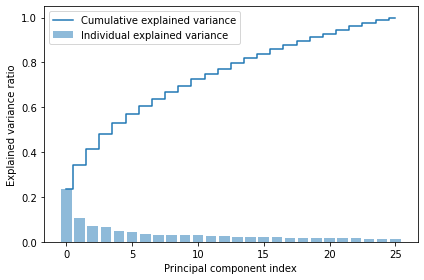

In [12]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

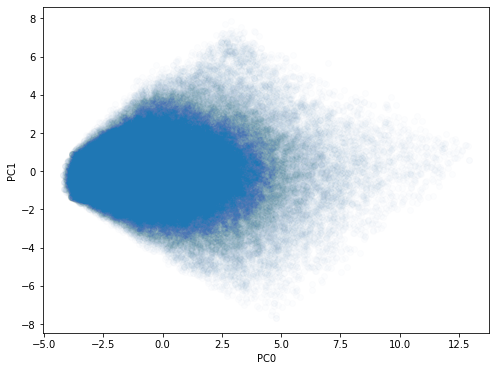

In [26]:
plt.scatter(x=df_pca[0], y=df_pca[1], alpha=0.01)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

# Kernel PCA

In [16]:
df_survey_beh_sample = df_survey_beh.sample(n=10000)

In [17]:
x_sample = StandardScaler().fit_transform(df_survey_beh_sample)

In [18]:
x_sample.shape

(10000, 26)

In [19]:
# To-Do: Check for positive semi definite

In [20]:
kpca = KernelPCA(n_components=26, eigen_solver='arpack', copy_X=False, kernel='poly', degree=4)
x_kpca = kpca.fit_transform(x_sample)
df_kpca = pd.DataFrame(x_kpca)
df_kpca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.067620,2.254185,-0.548502,-1.455793,-0.425714,1.154544,-0.818846,0.594805,-0.808964,0.760634,0.682594,-0.015080,-1.234443,1.170270,0.645407,0.588437,1.181761,-0.058268,-0.230414,-0.631566,-0.559607,-0.200105,0.346556,0.522617,-1.101610,1.365736
1,-0.633327,-0.182447,0.354627,0.182191,0.065038,0.093489,-0.062463,-0.138546,-0.394605,-0.011153,0.128635,-0.304131,-0.137725,0.138789,-0.219956,0.070348,0.071578,0.469826,0.135626,0.158161,-0.140237,0.419178,0.282842,-0.617415,-0.041992,-0.015264
2,1.329748,-0.285473,-0.461723,-0.960880,-0.140777,-0.072791,-0.651191,-0.729738,-0.283744,0.337685,-0.588736,-0.023878,-0.288384,-0.254867,0.076461,-0.186330,0.512685,0.007712,-0.250472,-0.450918,-0.090563,0.166707,-0.057285,0.286875,-0.230163,-0.548602
3,-0.691684,-0.132131,0.646779,0.388254,0.210721,0.160754,0.306069,-0.089480,-0.221536,-0.266099,-0.084970,-0.430312,0.053680,0.491943,-0.334661,0.015180,-0.090125,0.067873,0.054883,0.096784,-0.007208,0.018635,0.111756,-0.066466,0.096576,-0.056632
4,2.466320,0.242890,-0.947128,0.275344,-1.470301,-0.496724,0.004868,-0.663483,-0.141448,0.197904,-2.288332,0.286241,-0.370413,-0.269317,-0.191070,-0.145657,0.438059,0.318311,-0.574417,0.087848,-1.386364,-0.493740,-0.352005,0.131820,-0.825578,0.743565


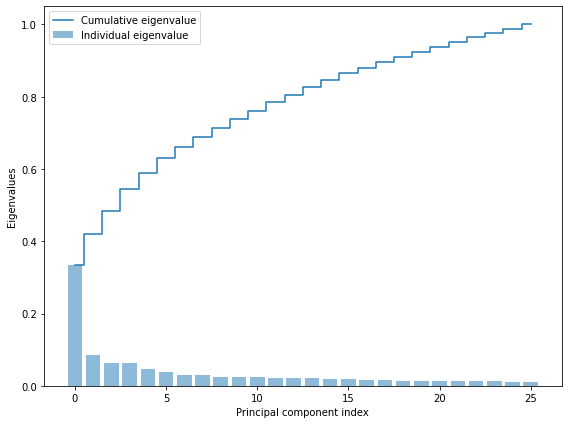

In [21]:
var_values = kpca.eigenvalues_ / sum(kpca.eigenvalues_)

cum_sum_eigenvalues_kpca = np.cumsum(var_values)

plt.bar(range(0,len(var_values)), var_values, alpha=0.5, align='center', label='Individual eigenvalue')
plt.step(range(0,len(cum_sum_eigenvalues_kpca)), cum_sum_eigenvalues_kpca, where='mid',label='Cumulative eigenvalue')
plt.ylabel('Eigenvalues')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

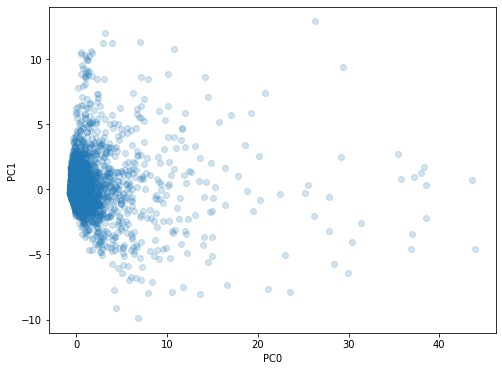

In [27]:
plt.scatter(x=df_kpca[0], y=df_kpca[1], alpha=0.2)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()